<a href="https://colab.research.google.com/github/chanhyeong00/machine_learning_study/blob/main/pytorch-computer%20vision/%EA%B0%9D%EC%B2%B4%20%ED%83%90%EC%A7%80/5_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YOLOv8 모델로 포즈추정(Pose Estimaion)을 수행한다.

## 울트라리틱스 라이브러리 설치

In [35]:
pip install ultralytics

In [ ]:
pip install ultralytics opencv-python

## YOLOv8 포즈 추정 모델 불러오기

In [2]:
from ultralytics import YOLO

model = YOLO("../models/yolov8m-pose.pt")

100%|██████████| 50.8M/50.8M [00:00<00:00, 186MB/s]


YOLOv8 모델은 yolov8n, yolov8s, yolov8m, yolov8l, yolov8x로 총 다섯 개의 모델이 지원된다

모델 명칭 접미사(suffix)에 아무것도 입력하지 않으면 기본 검출 모델을 불러온다.

접미사에 -seg, -cls, -pose 를 입력하는 경우 각각 세그멘테이션 모델, 분류 모델, 포즈 추정 모델을 불러온다.

YOLOv8은 MS COCO 데이터세트를 활용해 학습했으므로 80개의 클래스를 예측 가능하다. 포즈 추정 모델의 경우 사람 객체만 예측한다.

## OpenCV를 활용해 비디오 파일 불러오기

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# 비디오 읽기 클래스로 비디오 파일 또는 카메라 장치를 불러온다.
# 0, 1 같은 정수를 입력하는 경우 카메라 장치 번호로 간주해 카메라를 불러온다.
capture = cv2.VideoCapture("woman.mp4")
# 키 입력 대기함수 waitKey
# 키 이벤트 발생까지 대기하거나, 지정된 시간까지 대기한다.
while cv2.waitKey(10) < 0: # 키 입력이 없다면 10ms 까지 대기하고 반복한다.
    # 비디오를 무한히 반복하도록 프레임 변경.
    # 비디오 읽기 클래스의 속성 반환(get) 메서드와 속성 설정(set) 메서드로 비디오의 설정을 읽거나 변경 가능
    # CAP_PROP_POS_FRAMES: 비디오의 현재 프레임, CAP_PROP_FRAME_COUNT: 비디오의 총 프레임 수
    # 현재 프레임이 총 프레임수와 같아지면 첫 번째 프레임으로 변경
    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        capture.set(cv2.CAP_PROP_POS_FRAMES, 0)

    # 프레임을 읽어 반환한다.(결괏값(ret), 프레임(frame) 반환
    # 프레임을 읽은 경우 결괏값은 True 반환, 프레임은 넘파이 배열 형태로 반환
    ret, frame = capture.read()

    # 이미지를 별도의 윈도로 출력
    # 이 함수는 8비트 단일 채널 또는 3채널 이미지를 특정 이름의 창에 표시
    # cv2.imshow("VideoFrame", frame)
    # 그러나 코랩에선 창을 못 띄우므로 그 대안으로
    cv2_imshow(frame)

# while문 종료되면 비디오 읽기 클래스 닫고 메모리 해제
capture.release()
# 모든 창 제거
cv2.destroyAllWindows()

## 모델 추론

In [22]:
import torch


def predict(frame, iou=0.7, conf=0.25):
    results = model(
        source=frame, # 입력 이미지나 프레임
        device="0" if torch.cuda.is_available() else "cpu", # 인덱스 번호나 cpu 전달
        iou=0.7, # 중복된 경계 상자를 제거하는 임곗값이며, 너무 높은 값으로 설정시 중복된 경계 상자가 제거되지 않을 수 있다.
        conf=0.25, # 정학도로, 클래스 점수 임곗값으로 설정한 정확도보다 낮은 값은 제거된다.
        verbose=False, # 로그 정보로, 모델 수행시 출력되는 정보 표시 여부이다.
    )
    # YOLOv8 모델은 배치 형태로 이미지를 입력받을 수 있다.
    # 현재 예제는 하나의 프레임만 전달하므로 첫 번째 인덱스만 사용
    result = results[0]
    return result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'person'}
obb: None
orig_img: array([[[215, 214, 216],
        [215, 214, 216],
        [215, 214, 216],
        ...,
        [ 56,  59,  57],
        [ 57,  60,  58],
        [ 56,  59,  57]],

       [[215, 214, 216],
        [215, 214, 216],
        [215, 214, 216],
        ...,
        [ 57,  60,  58],
        [ 57,  60,  58],
        [ 55,  58,  56]],

       [[215, 214, 216],
        [215, 214, 216],
        [215, 214, 216],
        ...,
        [ 62,  65,  63],
        [ 61,  64,  62],
        [ 59,  62,  60]],

       ...,

       [[204, 206, 208],
        [204, 206, 208],
        [204, 206, 208],
        ...,
        [195, 190, 196],
        [195, 190, 196],
        [195, 190, 196]],

       [[204, 206, 208],
        [204, 206, 208],
        [204, 206, 208],
        ...,
        [195, 190, 196],

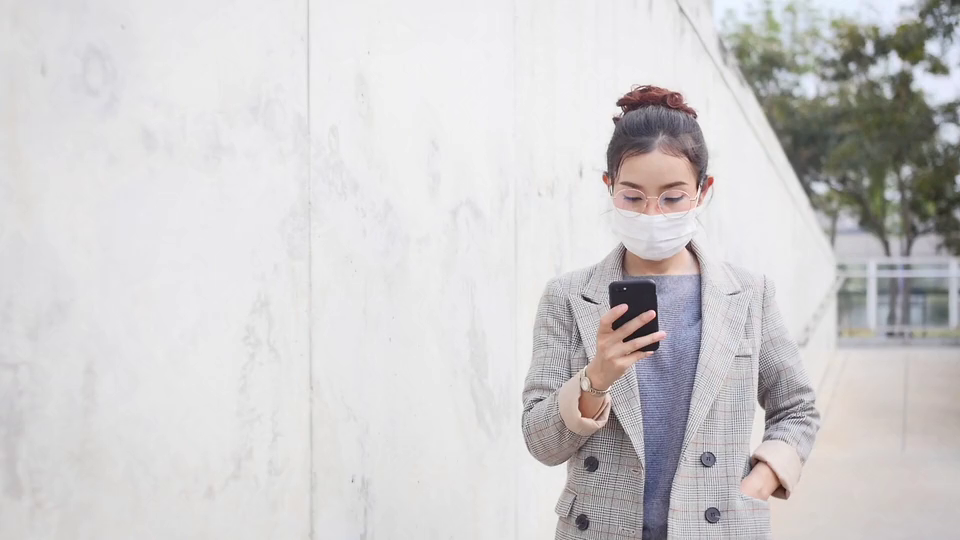

In [23]:
import cv2
from google.colab.patches import cv2_imshow

capture = cv2.VideoCapture("woman.mp4")

while cv2.waitKey(10) < 0: # 키 입력이 없다면 10ms 까지 대기하고 반복한다.

    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        capture.set(cv2.CAP_PROP_POS_FRAMES, 0)

    ret, frame = capture.read()
    if ret: # 추론
      print(predict(frame))

    cv2_imshow(frame)
    break # 프레임 하나만

capture.release()
cv2.destroyAllWindows()

YOLOv8은 어떤 모델이든 동일한 형태로 출력값을 반환한다. 예측 결과를 출력하면 현재 모델에서 지원되는 **속성(attributes)**을 확인할 수 있다.

- 속성을 통해 모델에서 지원되는 키(keys), 클래스(names), 모델 속도(speed) 등을 확인할 수 있다.

- 키 속성을 보면 포즈 추정 모델은 **경계 상자(boxes)** 와 **키 포인트(keypoints)** 속성이 지원된다.

- 경계 상자 속성을 확인해보면 results[0].boxes와 같은 정보를 확인할 수 있다.

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.9539], device='cuda:0')
data: tensor([[520.0000,  85.0000, 822.0000, 533.0000,   0.9539,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (540, 960)
shape: torch.Size([1, 6])
xywh: tensor([[671., 309., 302., 448.]], device='cuda:0')
xywhn: tensor([[0.6990, 0.5722, 0.3146, 0.8296]], device='cuda:0')
xyxy: tensor([[520.,  85., 822., 533.]], device='cuda:0')
xyxyn: tensor([[0.5417, 0.1574, 0.8563, 0.9870]], device='cuda:0')


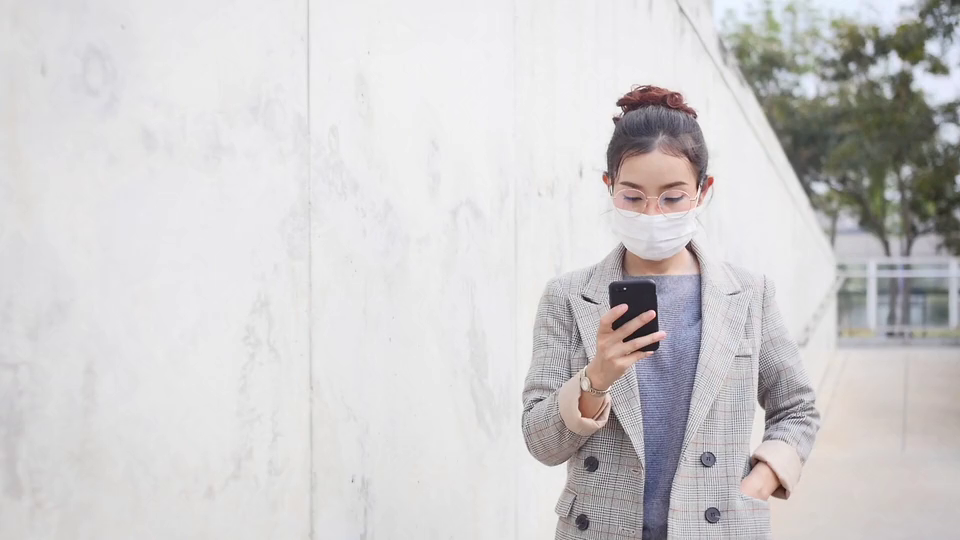

In [24]:
import torch


def predict(frame, iou=0.7, conf=0.25):
    results = model(
        source=frame, # 입력 이미지나 프레임
        device="0" if torch.cuda.is_available() else "cpu", # 인덱스 번호나 cpu 전달
        iou=0.7, # 중복된 경계 상자를 제거하는 임곗값이며, 너무 높은 값으로 설정시 중복된 경계 상자가 제거되지 않을 수 있다.
        conf=0.25, # 정학도로, 클래스 점수 임곗값으로 설정한 정확도보다 낮은 값은 제거된다.
        verbose=False, # 로그 정보로, 모델 수행시 출력되는 정보 표시 여부이다.
    )
    # YOLOv8 모델은 배치 형태로 이미지를 입력받을 수 있다.
    # 현재 예제는 하나의 프레임만 전달하므로 첫 번째 인덱스만 사용
    result = results[0]
    return result


    import cv2
from google.colab.patches import cv2_imshow

capture = cv2.VideoCapture("woman.mp4")

while cv2.waitKey(10) < 0:

    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        capture.set(cv2.CAP_PROP_POS_FRAMES, 0)

    ret, frame = capture.read()
    if ret:
      print(predict(frame).boxes)

    cv2_imshow(frame)
    break # 프레임 하나만
# while문 종료되면 비디오 읽기 클래스 닫고 메모리 해제
capture.release()
# 모든 창 제거
cv2.destroyAllWindows()

result.boxes도 현재 모델에서 지원하는 속성을 보여준다. (위에 찍어둠)

- 속성 중 **데이터(data)** 속성은 경계 상자의 [x1, y1, x2, y2, conf, cls] 구조로 출력
- 신뢰도(confidence, conf)는 추론된 객체의 점수를 의미
- 클래스(class, cls)는 객체의 인덱스 번호를 의미



## OpenCV로 경계 상자 시각화

In [25]:
def draw_boxes(result, frame):
    for boxes in result.boxes:
        # (x1, y1), (x2, y2), 색상, 선두깨(음수로 입력하면 내부가 채워진 사각형이 그려짐)
        x1, y1, x2, y2, score, classes = boxes.data.squeeze().cpu().numpy()
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 1)
    return frame

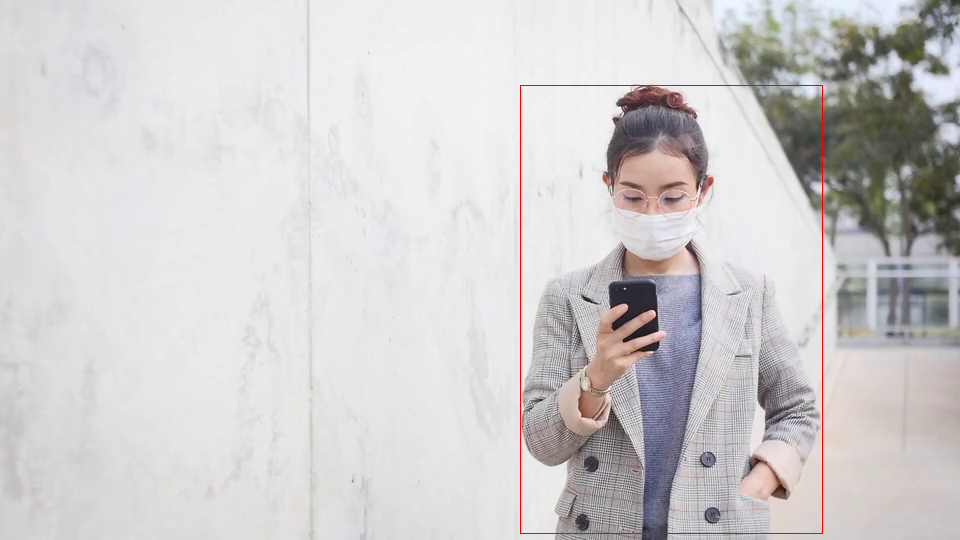

In [29]:
import cv2
from google.colab.patches import cv2_imshow

capture = cv2.VideoCapture("woman.mp4")
while cv2.waitKey(10) < 0:
    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        capture.set(cv2.CAP_PROP_POS_FRAMES, 0)

    ret, frame = capture.read()
    result = predict(frame)
    frame = draw_boxes(result, frame)
    cv2_imshow(frame)
    break # 하나만 보기 위함

capture.release()
cv2.destroyAllWindows()

매우 우수하게 경계 상자를 예측하는 것을 볼 수 있다.

## 키 포인트 시각화

In [53]:
from ultralytics.utils.plotting import Annotator

def draw_keypoints(result, frame):
    # 울트라리틱스 라이브러리는 시각화(Annotator) 클래스를 지원한다.
    # 시각화 클래스는 이미지와 선 두께를 전달해 인스턴스를 생성한다.
    annotator = Annotator(frame, line_width=1)

    # 키 포인트는 사람의 수만큼 존재하므로 반복문으로
    for kps in result.keypoints: # 예측 결과에서 키 포인트 속성 추출
        kps = kps.data.squeeze()

        # kpts: 키포인트 시각화 메서드
        # [17, 3] 형태의 데이터 입력으로 받음
        # MS COCO 키 포인트 데이터는 17개의 신체 부위 예측.
        # 그러므로 키 포인트 데이터 구조는 [x, y, conf] 구조로 반환된다.
        annotator.kpts(kps)
        nkps = kps.cpu().numpy()

        # 시각화 메서드는 항상 정확도 0.5 이상인 키 포인트만 시각화
        # nkps[:,2] = 1 # 이 코드는 모든 키 포인트를 시각화(모든 키포인트의 정확도를 1로 변경)
        # annotator.kpts(nkps)
        for idx, (x, y, score) in enumerate(nkps):
            if score > 0.5:
                # 원 그리기 함수
                # 이미지, 중심점, 반지름, 색상, 두께 입력받음
                cv2.circle(frame, (int(x), int(y)), 3, (0, 0, 255), cv2.FILLED)

                # 문자열 그리기
                # 이미지, 문자열, 위치, 글꼴, 글꼴 크기, 색상, 두께 입력 받음
                cv2.putText(frame, str(idx), (int(x), int(y)), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1)

    return frame

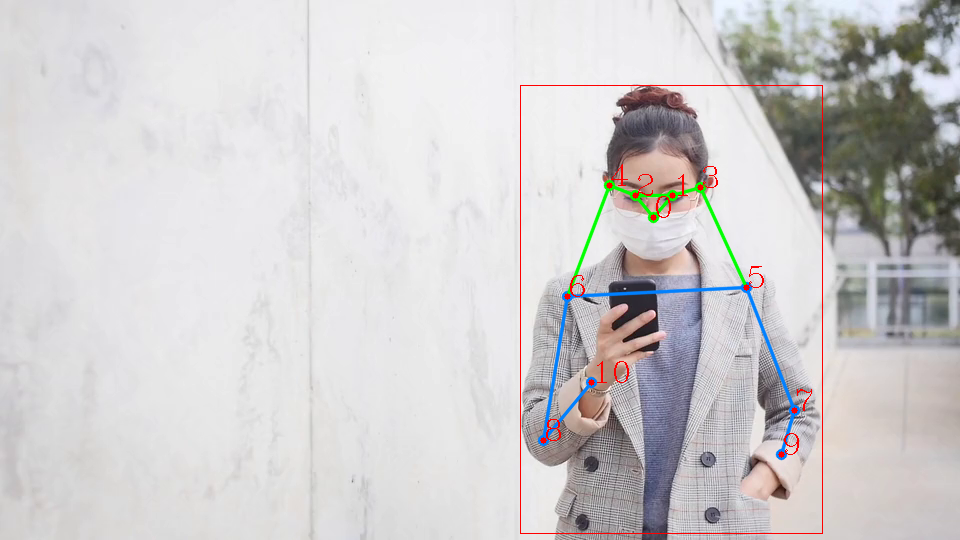

In [50]:
import cv2
from google.colab.patches import cv2_imshow

capture = cv2.VideoCapture("woman.mp4")
while cv2.waitKey(10) < 0:
    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        capture.set(cv2.CAP_PROP_POS_FRAMES, 0)

    ret, frame = capture.read()
    result = predict(frame)
    frame = draw_boxes(result, frame)
    frame = draw_keypoints(result, frame)
    cv2_imshow(frame)
    break
capture.release()
cv2.destroyAllWindows()

        # nkps[:,2] = 1 # 이 코드는 모든 키 포인트를 시각화(정확도를 모두 1로 변경)
        # annotator.kpts(nkps)


실행

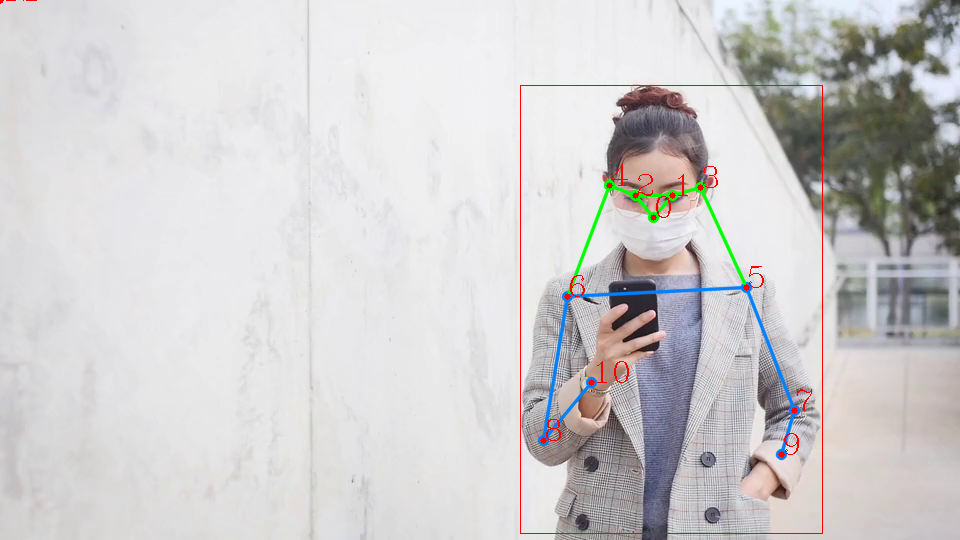

In [54]:
import cv2
from google.colab.patches import cv2_imshow

capture = cv2.VideoCapture("woman.mp4")
while cv2.waitKey(10) < 0:
    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        capture.set(cv2.CAP_PROP_POS_FRAMES, 0)

    ret, frame = capture.read()
    result = predict(frame)
    frame = draw_boxes(result, frame)
    frame = draw_keypoints(result, frame)
    cv2_imshow(frame)
    break
capture.release()
cv2.destroyAllWindows()